<h1><center><b>EV FİYAT ANALİZİ</b></center></h1>
<h4>Emeği Geçenler:</h4>
<ul>
    <li>Fatma Nur Usluer</li>
    <li>Fatma Pınar İpek Fıratlı</li>
    <li>Furkan Kılınç</li>
    <li>Gizem Çimen</li>
    <li>Gülşah Uğur</li>
    <li>Hakan Ayman</li>
    <li>İrem Yalçın</li>
    <li>İrfan Türkmen</li>
    <li>Kemal Burak Arıboğa</li>
    <li>Mustafacan Gençgül</li>
</ul>


<h3>Gerekli kütüphanelerin dahil edilmesi</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

<h1> Keşifçi Veri Analizi - EDA </h1>

In [2]:
# Veri setinin okunması ve bir kopyasının alınarak temiz tutulması.
df_train = pd.read_csv('train.csv')
df_test = df_train.copy()
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<br>
<p align=justify>Öncelikle elimizdeki veri setini anlamak için her kolonu ayrı ayrı ele alıp inceleyerek bize ne anlattığını kavramak iyi olabilir. Sektör bilgisi açısından zayıf olunan kısımları tamamlamak ve verilere fazlasıyla hakim olmak açısından her ne kadar zaman alsa da bu kolonları tek tek inceledik. Öncelikle bizden istenildiği şekilde bu veriler özelinde Variable, Type, Segment, Expectation, Conclusion, Comments değişkenleri oluşturup, tartışarak verilerimize göre ilgili değişkenleri tanımladık. Bu değişkenleri yaratmak ve verilerimize göre ilgili değişkenleri tanımlamak, verilerimizi tanımaya ve onlarla ne tarz işlemler yapmamız gerektiği hakkında bize yol oluşturdu. Sırasıyla bu adımları gerçekleştirelim. </p>

<h2><b>SalePrice Analizi</b></h2>
<p align = justify>Veri setinin bize anlattığı, elimizde bir ev var ve her evin değişken özellikleri vardır. Tabii sonucunda ise bu evin bir fiyatı vardır. Bizim burda yapmak istediğimiz çalışma ise evin sahip olduğu bu fiyatı nelerin belirlediği ve bizim bu fiyatı tahmin edebilecek olup olmadığımızdır. Öncelikle hedefimiz olan <b>SalePrice</b> değişkenine daha yakından bakıp yorumlayalım.</p>
<br>

In [3]:
# Tanımlayıcı istatistik hesaplaması
df_train[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<br>
<p align=justify>Çıkan sonucu incelediğimizde ortalama değerin medyan değerden biraz daha yüksek olduğunu görüyoruz ve bu da bize tam olarak normal dağılmadığını gösteriyor. Minimum değerin ise sıfır olmaması bizim için güzel bir haber, ekstra bir işleme gerek duymadığını gösteriyor. Maximum değerin ise ortalamadan çok fazla yüksek olması, outlier değerlerin varlığına işaret etmektedir.</p>
<br>

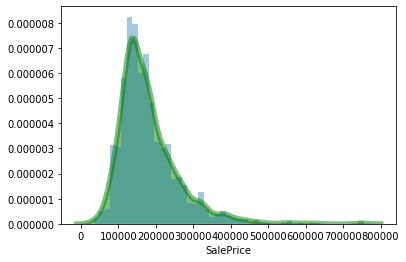

In [4]:
# SalePrice histogram grafiği
sns.distplot(df_train.SalePrice,
             kde=True,
             kde_kws={"color": "g", "alpha": 0.5, "linewidth": 5, "shade": True},);


<br>
<p align=justify>Histogram grafiğini incelediğimizde hedef değerimizin pozitif çarpıklığa sahip olduğunu ilk bakışta anlayabiliyoruz. Bu durum da üst çeyrekler açıklığının daha fazla olması anlamına gelebilir, grafiği incelediğimizde de durumun bu şekilde olduğu anlaşılmaktadır.</p>

<h3><b>SalePrice'ın ilişkileri</b></h3>
<p align=justify>Hedefimizin, diğer değerlerimiz ile nasıl bir ilişki içerisinde olduğunu merak ederiz. Elimizdeki değerlerin <b>SalePrice</b> ile ilişkilerini tek tek ele alacağız fakat öncesinde genel bir analiz için korelasyon matrixini inceleyebiliriz.</p>
<br>

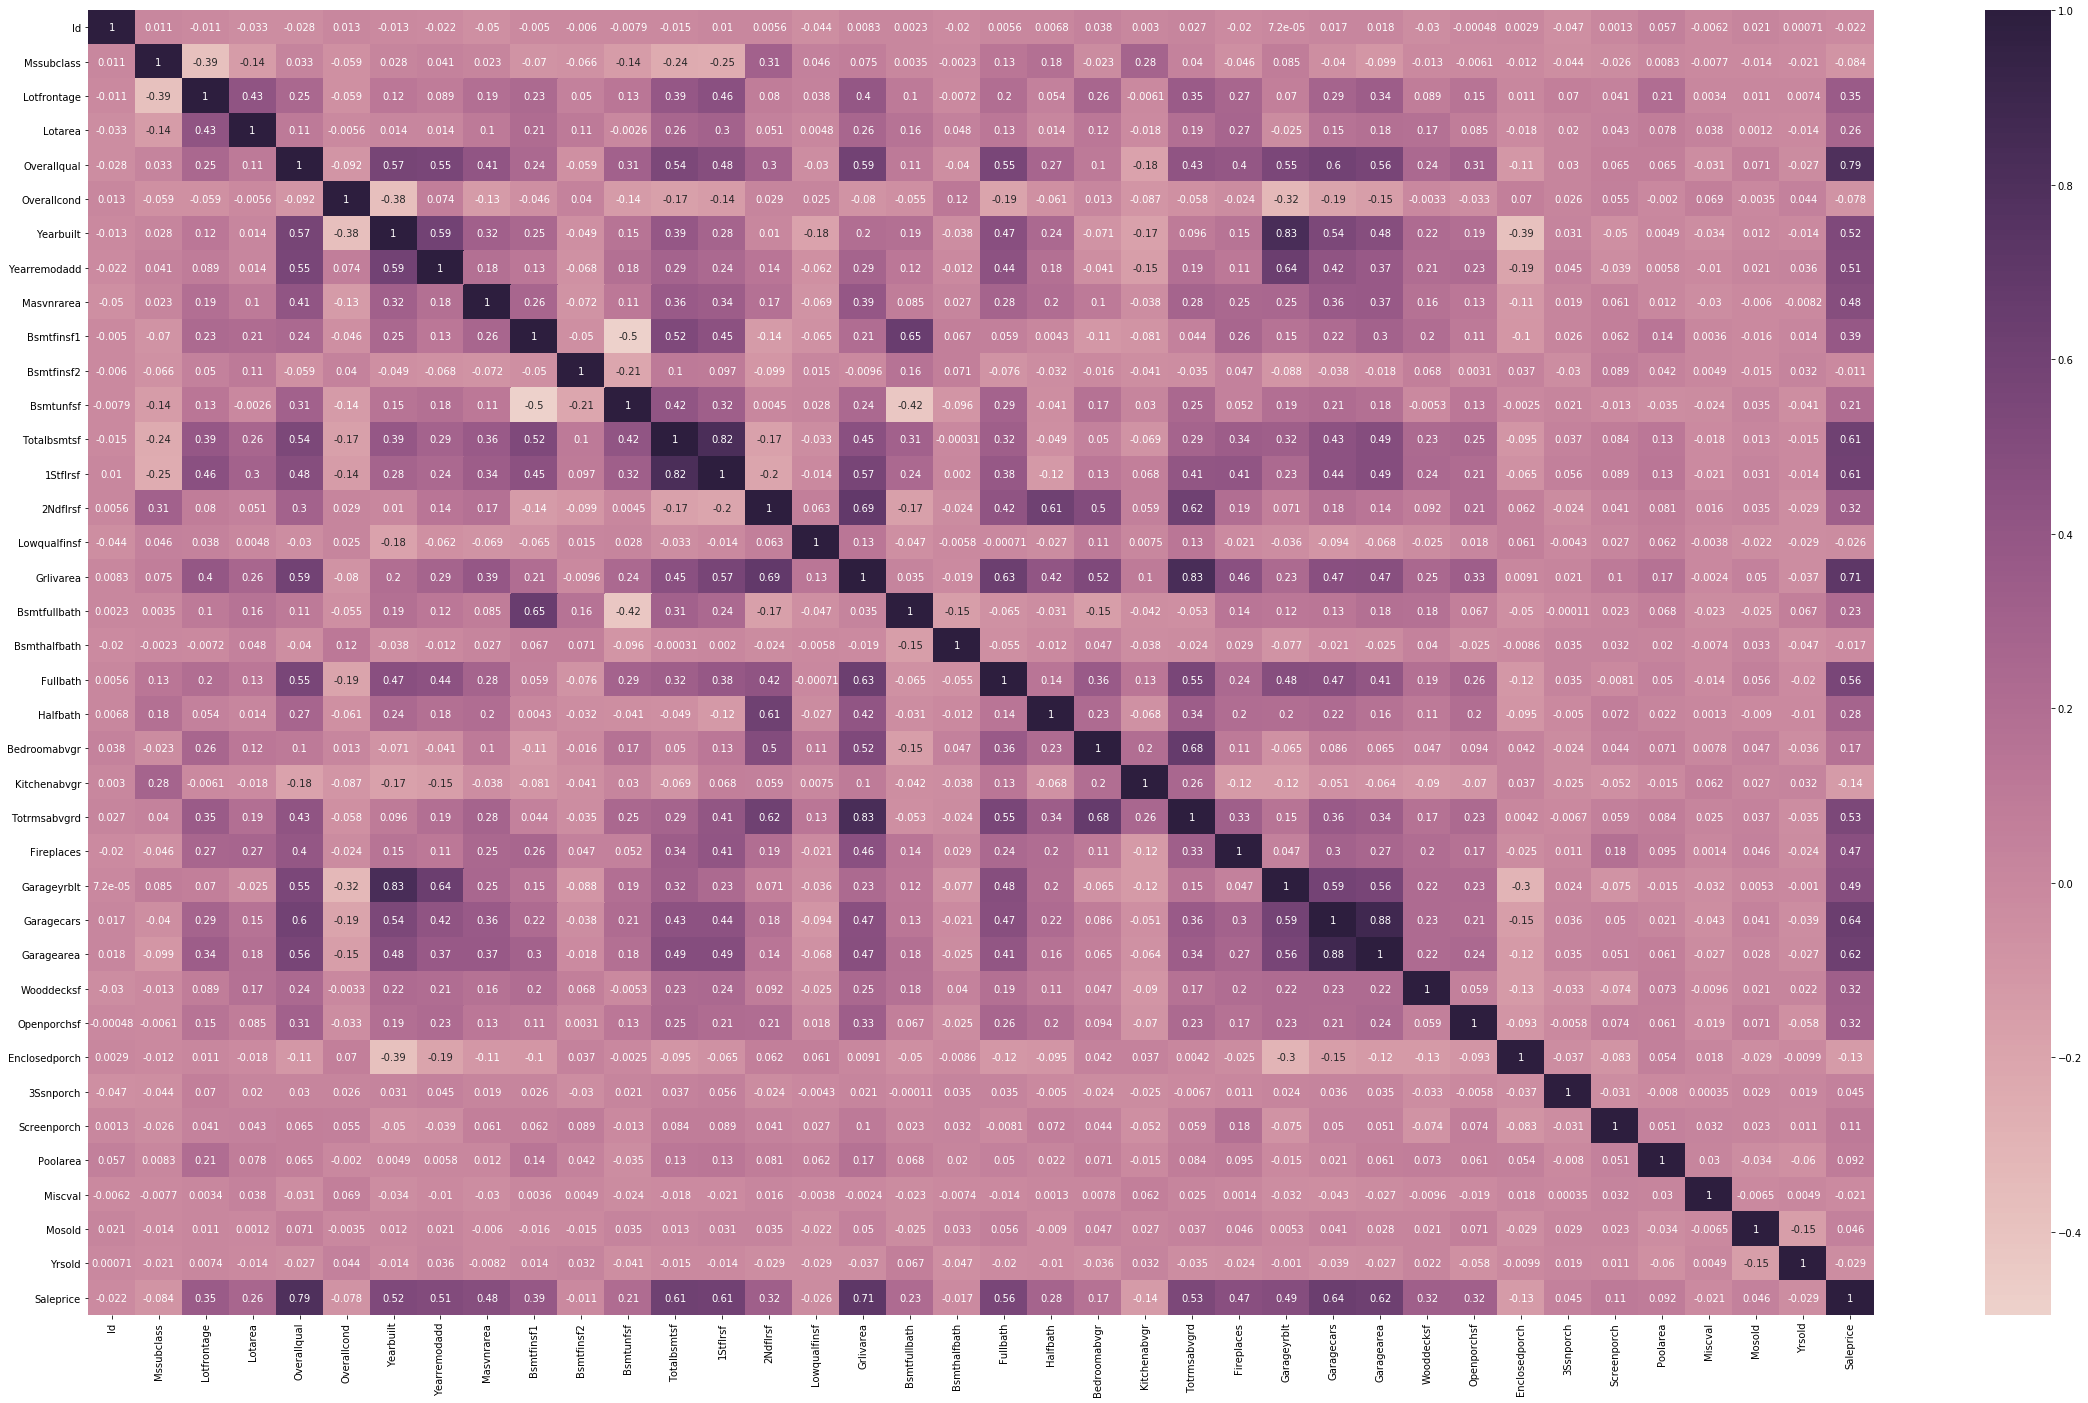

In [5]:
h_labels = [x.replace('_', ' ').title() 

#Değerlerimizin korelasyon matrixi oluşturmaya uygun olanlarının seçilmesi.
for x in list(df_train.select_dtypes(include=['number', 'bool']).columns.values)]

# Haritanın oluşturulması ve değişkenlerinin tanımlanması.
fig, ax = plt.subplots(figsize=(40,24))
_ = sns.heatmap(
df_train.corr(), 
annot=True, 
xticklabels=h_labels, 
yticklabels=h_labels, 
cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<br>
<p align=justify>Korelasyon haritamızı ve değerlerini çıkarttık. Peki bu harita bize ne anlatmakdır? Haritamıza baktığımızda <b>Overallqual, GrLivArea, Garagecars, Garagearea, Totalbsmtsf</b> gibi veriler değerlerinin yüksekliğiyle dikkatimizi çekmektedir. Harita ile ilk analimizi yaptık ve artık bu verilerin <b>SalePrice</b> ile olan ilişkisini inceleyebiliriz.</p>
<h4>Nümerik verilerin SalePrice ile ilişkileri</h4>
<br>

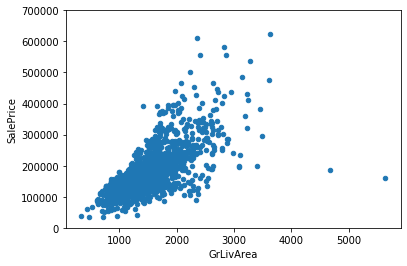

In [6]:
# GrLivArea / SalePrice ilişkisinin grafiğinin oluşturulması
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var ,y='SalePrice', ylim=(0,700000));

<br>
<p align=justify>Bodrum dışında kalşan alanı ifade eden bu değer ile fiyat arasında lineer bir ilişki olduğunu gözlemliyoruz. Korelasyon değerinin neden yüksek çıktığı şimdi daha iyi anlaşılmaktadır. En güçlü adaylarımızdan birisi olarak kaydedip diğer değişkenlerimizle devam edebiliriz.</p>
<br>

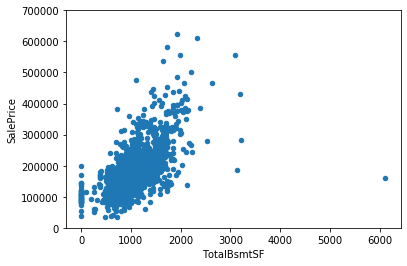

In [7]:
# TotalBsmtSF / SalePrice ilişkisinin grafiğinin oluşturulması
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var ,y='SalePrice', ylim=(0,700000));

<br>
<p align=justify>Yine yüksek korelasyon değerine sahip olan <b>TotalBsmtSF</b> parametresi toplam bodrum alanını ifade etmektedir. Bu değişkenin neden yüksek korelasyon değerine sahip olduğu yine grafiği incelediğimizde gözükmektedir. Bir kaç outlier değerin grafiğin eğimini değiştirdiği, bunların düzenlendikten sonra verinin çok daha faydalı olabileceği bilgisini kaydedip diğer değerlerimiz incelemeye devam edebiliriz.</p>
<p align=justify>Diğer nümerik değerleri de bu grafiklerle inceleyerek her birinin kullanılabilir olup olmamasına, kullanılabilirse ne kadar etkili olduğuna karar verip excel dosyasına not aldık. Daha sonra bu değerler üzerinde işlemler gerçekleştireceğiz fakat şimdi sıra <b>kategorik</b> değişkenlerimizin <b>SalePrice</b> ile olan ilişkilerini incelemekte.</p>
<h4>Kategorik verilerin SalePrice ile ilişkileri</h4>
<br>

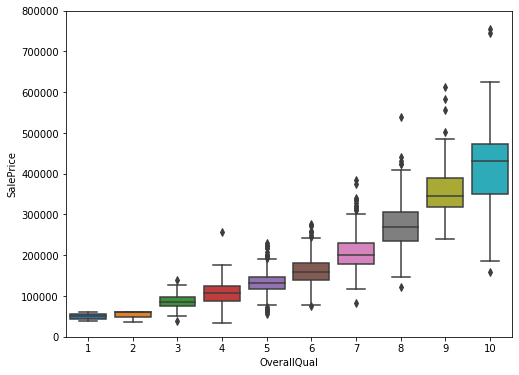

In [8]:
# OverallQual / SalePrice ilişkisinin grafiğinin oluşturulması
cat = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[cat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<br>
<p align=justify>Bir artış grafiği görüyoruz ama lineerlikten uzak ve polinomik şekle dönük. 6-7 ye kadar olan alanı açıklıkları daha az olduğu için farklı bir alanda, geri kalanı farklı alanda değerlendirebiliriz. 9'da outlier sayısı çok fazla mesela ve açıklık yukarı doğru kaymış. Genel olarak faydalı olabilecek veriler arasına kaydedip diğer kategorik değişkenleri incelemeye devam ediyoruz.</p>
<br>

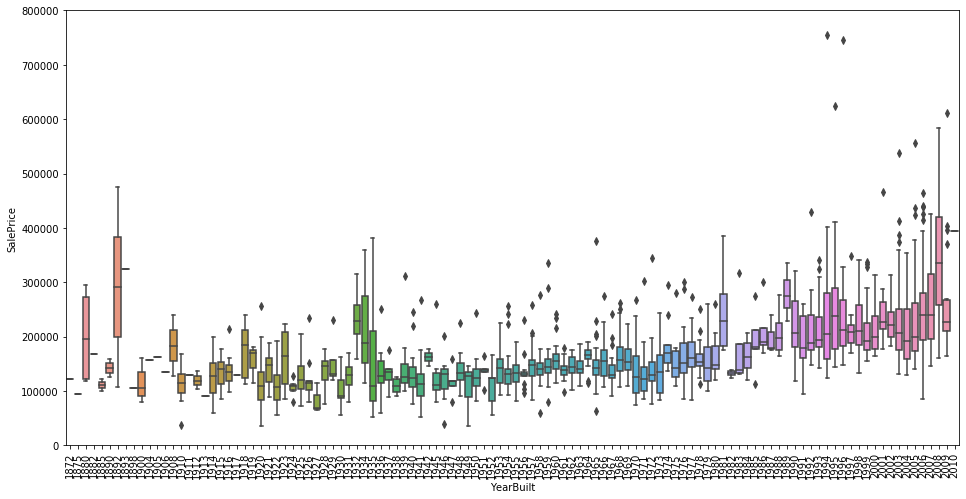

In [9]:
# YearBuilt / SalePrice ilişkisinin grafiğinin oluşturulması
cat = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[cat]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=cat, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

<p align=justify>Binanın yapım yılı olan <b>YearBuilt</b> değişkeni ile satış fiyatı arasında çok da mükemmel olmayan bir ilişki olduğunu söyleyebiliriz. Bu grafikten çıkaracağımız en genel sonuç ise bina yaşının azaldıkça fiyatlarının biraz daha arttığıdır. 
<br><br>
Özetle, burada iki kategorik ve iki nümerik olmak üzere dört farklı değişkenin ufak analizini yaptık. Fakat diğer tüm verilerimizi bu yöntemleri kullanarak tek tek ele aldık ve çıkarımlarımızı excel dosyasına kaydettik. Bundan sonraki aşamalarda da kaydetmiş olduğumuz bu çıkarımları kullanarak veri setimiz üzerinde gerekli işlemleri yapmak. İlk olarak kayıp veri sayısı çok olan ve işe yaramayacağını düşündüğümüz değişkenlerden kurtulmaya karar verdik.
</p>
<br>
<h2><b>Kayıp Veriler ve İşe Yaramaz Değişkenler</b></h2>

In [10]:
print('Kayıp verilerin oranı')
print('-'*30)

# Kayıp veri yüzdesinin hesaplanması
missing_percent = (df_train.isna().sum()/df_train.shape[0]).sort_values(ascending=False)

#Toplam kayıp veri sayısının hesaplanması
missing_total = df_train.isnull().sum().sort_values(ascending=False)

#Kayıp değerlerin yeni oluşturulan veri setine aktarılması
missing_values = pd.concat([missing_total, missing_percent], axis=1, keys=['Toplam', 'Yüzde (%)'])
missing_values.head(20)

Kayıp verilerin oranı
------------------------------


,Toplam,Yüzde (%)
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<ul >
    <li align=justify><b>PoolQC</b> ve <b>MiscFeature</b> değişkenleri yüzde 95'ten fazla null veri içerdiği, kalan az sayıda veriler de hedefimize etki edebilecek spesifik veriler olmadığı için silmeye karar verdik. Ayrıca yüzde 93 kadar null veri içeren ve var olan verilerin de etkisiz olduğu <b>Alley</b> değişkeninden de kurtulabiliriz. <b>Street</b> değişkenimizin varlığı, onun yokluğunu hatırlatmayacaktır.</li>
    <li align=justify><b>FireplaceQu</b> değişkeni yaklaşık yüzde 50 veri kaybı yaşamaktadır. Bu değeri kurtarmalı mıyız diye kendimize sorduğumuzda, değişkenin var olan verilerini inceledik. Pek kurtarmaya değer olmadığını düşünürken, var olduğunu fark ettiğimiz <b>Fireplaces</b> değişkeninin nispeten yüksek korelasyon değeri ile <b>FireplaceQu</b> değişkeninin yerine de kullanılabileceğine de karar verdik. Muhtemelen şöminenin kalitesindense sayısına daha çok değer veriyorlar diye bir yorum yapılabilir.</li>
    <li align=justify><b>LotFrontage</b> değerimizi korumaya ve kayıp verilerini doldurmaya karar verdik fakat onun altında yer alan garajla alakalı bütün verilerden kurtulmayı amaçladık. İnsanların eve paha biçerken garajla alakalı olarak en çok büyüklüğüne ya da araç kapasitesine önem verdiğini düşündük. Korelasyon haritasını incelediğimizde de bu <b>GarageCars</b> ve <b>GarageArea</b> değişkenlerinin gerçekten yüksek korelasyon değişkenlerine sahip olduğunu görebiliriz. Ve hatta aracın araç kapasitesinin, alanından daha önemli olduğunu düşünüp, garajla alakalı olarak sadece <b>GarageCars</b> parametresini tutup diğerlerinden kurtulma kararı aldık.</li>
    <li align=justify>Aynı şekilde bodrumla alakalı olarak kayıp veri içeren tüm kategorik değişkenlerden kurtulup, onları temsil edebilme kabiliyeti ve korelasyon değerleri yüksek olan nümerik değşkenleri onların yerine kullanmaya karar verdik.</li>
    <li align=justify><b>Utilities</b>, <b>Heating</b> ve <b>CentralAir</b> parametrelerininde çok fazla dengesiz olması, tek bir değerde yoğunlaşması ve normalleştirilememesi gibi gerekçelerle yok edilmesine karar verildi. Bu kararlarında ilerde bizi üzeceğini düşünmüyoruz.</li>
    <li align=justify><b>ExterQual</b> ve <b>ExterCond</b> değerlerinin modelimiz için hiç önemli değerler olmadığına karar verdik. Bu kararı alırken bu değişkenlerin fazlasıyla dengesiz dağılmasından yola çıktık. Ayrıca <b>Exterior1st</b> ve <b>Exterior2nd</b> değerlerinin nitelik olarak bu değerlere benzemesi ve nispeten daha sağlıklı veriler içermesi sebebiyle bu veriler yerine kullanılabileceği yönünde kararlar aldık.</li>
    <li align=justify><b>LowQualFinSF</b>, <b>BedroomAbvGr</b>, <b>KitchenAbvGr</b> değişkenlerini de etkisiz olması ve yerlerine daha farklı verilerin kullanılabilir olması sebebiyle yok ettik.</li>
    <li align=justify><b>EnclosedPorch</b>, <b>3SsnPorch</b> ve <b>ScreenPorch</b> değişkenlerinin aşırı etkisiz korelasyon değerleri yüzünden yok olmaya mahkum olduklarını gördük ve hiç üzülmedik. <b>WoodDeckPorchSF</b> ve <b>OpenPorchSF</b> değişkenlerinin yüksek korelasyona sahip olması, üzülmememiz üzerindeki ana etken. Bu verileri kolon bazında yok ettik fakat içerisindeki değerleri, hepsini toplayıp yeni bir kolon yaratarak ziyan etmedik.</li>
</ul>
    

In [11]:
#Silinecek olan kolonların listede toplanması
deleted_columns = ['Alley', 'Utilities', 'Heating', 'CentralAir', 'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond'
                  , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'BedroomAbvGr'
                  , 'KitchenAbvGr', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 
                   'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature'
                  , 'Fence']

#Toplanan liste ile ilgili kolonların silinmesi
df_train.drop(deleted_columns, axis = 1, inplace = True)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

<h2><b>İşe Yarayacak Yeni Değerler!</b></h2>
<br>
<p>İşe yaramayacağını düşündüğümüz bir çok veriden kurtulduk ve bir rahatladık. Şimdi sırada işe yarayabileceğini düşündüğümüz, farklı verilerin birleşimi ya da karşılıklı analizi ile türettiğimiz yeni verileri veri setimize ekleme işlemi var. Bunları tek tek ele alalım.</p>

<h3>1. BsmtFinSF - Toplam Bitmiş Bodrum Alanı</h3>
<p>Bu değişkeni <b>BsmtFinSF1</b> ve <b>BsmtFinSF2</b> değişkenlerinin toplamı şeklinde bulduk. İki farklı seçenek altında kayıt edilmiş bu iki değişkenin birleşirilerek ana toplam şekilde değerlendirilmesinin faydalı olacağını düşündük.

Korelasyon Değerleri
---------------------------------------------------------------------------
BsmtFinSF1 korelasyon değeri : 0.3864198062421531
BsmtFinSF2 korelasyon değeri : -0.011378121450215144
BsmtFinSF korelasyon değeri  : 0.36632769193495635
---------------------------------------------------------------------------


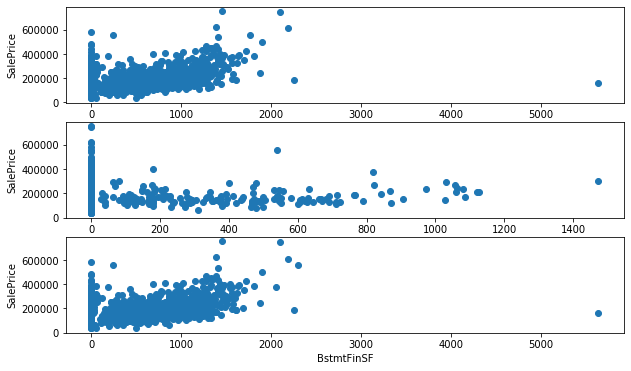

In [12]:
#İlgili kolon değerlerinin toplanıp yeni oluşturulan değere atanması
df_train['BsmtFinSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']

#Oluşturulan değer ile ilgili parametrelerin korelasyon değerlerinin yazdırılması
print('Korelasyon Değerleri')
print('-'*75)
print('BsmtFinSF1 korelasyon değeri :', df_train['SalePrice'].corr(df_test['BsmtFinSF1']))
print('BsmtFinSF2 korelasyon değeri :', df_train['SalePrice'].corr(df_test['BsmtFinSF2']))
print('BsmtFinSF korelasyon değeri  :', df_train['SalePrice'].corr(df_train['BsmtFinSF']))
print('-'*75)

#Tanımlanan üç değişkenin subplots grafiklerinin oluşturulması
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(x = df_test['BsmtFinSF1'], y = df_train['SalePrice'])
ax[0].set_xlabel("BsmtFinSF1")
ax[0].set_ylabel("SalePrice")

ax[1].scatter(x = df_test['BsmtFinSF2'], y = df_train['SalePrice'])
ax[1].set_xlabel("BstmtFinSF2")
ax[1].set_ylabel("SalePrice")

ax[2].scatter(x = df_train['BsmtFinSF'], y = df_train['SalePrice'])
ax[2].set_xlabel("BstmtFinSF")
ax[2].set_ylabel("SalePrice")

plt.show()

<p align=justify>Yaratmış olduğumuz toplam bodrum alanının, <b>BsmtFinSF1</b> ile çok benzer olduğunu görebiliriz. Bu da demek oluyor ki fazlasıyla etkisiz olan <b>BsmtFinSF2</b> değerinden kurtulabiliriz, tabii beraberinde <b>BsmtFinSF1</b>'i de götürerek. Yeni türettiğimiz değer, onların yokluğunu kesinlikle aratmayacaktır.</p>
<br>
<h3>2. TotalFlrSF - Toplam Bina Kat Alanı</h3>
<p align=justify>Elimizdeki veriler daha çok bodrum dışında kalan yaşam alanı ve bodrum yaşama alanı diye kayıt edilmiş. Veriler üzerinde ufak bir inceleme yaptığımızda ise bu değerlerin toplamının birinci kat ve ikinci kat toplamına eşit olduğunu fark ettik. Buradan toplam bina kat alanı gibi bir değişken üretebileceğimizi ve bunun kullanışlı olabileceğini düşündük. Hemen inceleyelim.</p>

Korelasyon Değerleri
---------------------------------------------------------------------------
TotalBsmtSF korelasyon değeri : 0.6135805515591954
GrLivArea korelasyon değeri   : 0.7086244776126518
TotalFlrSF korelasyon değeri  : 0.7789588289942257
---------------------------------------------------------------------------


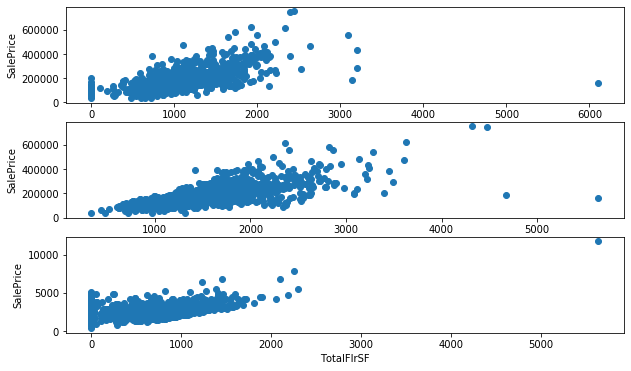

In [13]:
#İlgili kolon değerlerinin toplanıp yeni oluşturulan değere atanması
df_train['TotalFlrSF'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

#Oluşturulan değer ile ilgili parametrelerin korelasyon değerlerinin yazdırılması
print('Korelasyon Değerleri')
print('-'*75)
print('TotalBsmtSF korelasyon değeri :', df_train['SalePrice'].corr(df_test['TotalBsmtSF']))
print('GrLivArea korelasyon değeri   :', df_train['SalePrice'].corr(df_test['GrLivArea']))
print('TotalFlrSF korelasyon değeri  :', df_train['SalePrice'].corr(df_train['TotalFlrSF']))
print('-'*75)

#Tanımlanan üç değişkenin subplots grafiklerinin oluşturulması
fig, ax = plt.subplots(3, figsize=(10, 6))
ax[0].scatter(x = df_test['TotalBsmtSF'], y = df_train['SalePrice'])
ax[0].set_xlabel("TotalBsmtSF")
ax[0].set_ylabel("SalePrice")

ax[1].scatter(x = df_test['GrLivArea'], y = df_train['SalePrice'])
ax[1].set_xlabel("GrLivArea")
ax[1].set_ylabel("SalePrice")

ax[2].scatter(x = df_train['BsmtFinSF'], y = df_train['TotalFlrSF'])
ax[2].set_xlabel("TotalFlrSF")
ax[2].set_ylabel("SalePrice")

plt.show()

<p align=justify>Toplam bodrum alanını ifade edene <b>TotalBsmtSF</b> değişkeni ile bodrum dışında kalan yaşam alanını ifade eden <b>GrLivArea</b> değişkenlerini birleştirerek toplam yaşam alanı olan <b>TotalFlrSF</b> değişkenini yarattık. Bu değişkenin korelasyon değerinin ise zaten yüksek olan diğer iki değişkenden daha yükse bir değere sahip olduğunu yukarda görüyoruz. Zaten mantıklı düşüncelerimiz de toplam alanın fazlasıyla etkili olabileceğini söylemişti. Bunu ispatlamak hepimizi mutlu etti!</p>
<br>
<h3>3. TotalFullBath - TotalHalfBath - TotRmsAbvGrd</h3>
<p>Bu üç değişkeni mantıksal olarak neden birleştirdiğimizi ayrı ayrı ele alacak olursak:
    <ul>
        <li><b>TotalFullBath</b> değeri, toplam bodrum banyo sayısının ve bodrum harici toplam banyo sayısının toplamını ifade etmektedir.</li>
        <li><b>TotalHalfBath</b> değeri, bodrumda yer alan toplam WC sayısının ve bodrum harici toplam WC sayısının toplamını ifade etmektedir.</li>
        <li><b>TotRmsAbvGrd</b> değeri ise binadaki toplam oda sayısını ifade etmektedir.</li>
     </ul>
Bu değişkenlerin korelasyon değerlerini inceleyelim.
</p>

In [14]:
#İlgili kolon değerlerinin toplanıp yeni oluşturulan değere atanması
df_train['TotalFullBath'] = df_test['BsmtFullBath'] + df_test['FullBath']
df_train['TotalHalfBath'] = df_test['BsmtHalfBath'] + df_test['HalfBath']
df_train['TotRmsAbvGrd'] = df_test['BedroomAbvGr'] + df_test['KitchenAbvGr']

#Oluşturulan değer ile ilgili parametrelerin korelasyon değerlerinin yazdırılması
print('Korelasyon Değerleri')
print('-'*75)
print('BsmtFullBath korelasyon değeri   :', df_train['SalePrice'].corr(df_test['BsmtFullBath']))
print('FullBath korelasyon değeri       :', df_train['SalePrice'].corr(df_test['FullBath']))
print('TotalFullBath korelasyon değeri  :', df_train['SalePrice'].corr(df_train['TotalFullBath']), '<--')
print('-'*75)
print('BsmtHalfBath korelasyon değeri   :', df_train['SalePrice'].corr(df_test['BsmtHalfBath']))
print('HalfBath korelasyon değeri       :', df_train['SalePrice'].corr(df_test['HalfBath']))
print('TotalHalfBath korelasyon değeri  :', df_train['SalePrice'].corr(df_train['TotalHalfBath']), '<--')
print('-'*75)
print('KitchenAbvGr korelasyon değeri   :', df_train['SalePrice'].corr(df_test['KitchenAbvGr']))
print('BedroomAbvGr korelasyon değeri   :', df_train['SalePrice'].corr(df_test['BedroomAbvGr']))
print('TotRmsAbvGrd korelasyon değeri   :', df_train['SalePrice'].corr(df_train['TotRmsAbvGrd']), '<--')
print('-'*75)

Korelasyon Değerleri
---------------------------------------------------------------------------
BsmtFullBath korelasyon değeri   : 0.22712223313149404
FullBath korelasyon değeri       : 0.5606637627484453
TotalFullBath korelasyon değeri  : 0.5829341127530333 <--
---------------------------------------------------------------------------
BsmtHalfBath korelasyon değeri   : -0.016844154297359002
HalfBath korelasyon değeri       : 0.2841076755947828
TotalHalfBath korelasyon değeri  : 0.25062831491104415 <--
---------------------------------------------------------------------------
KitchenAbvGr korelasyon değeri   : -0.13590737084214105
BedroomAbvGr korelasyon değeri   : 0.1682131543007399
TotRmsAbvGrd korelasyon değeri   : 0.12104840202384638 <--
---------------------------------------------------------------------------


<h3>4. TotalPorch - Toplam Veranda Alanı</h3>
<p align=justify>Veranda alanı ile ilgili elimizde fazlasıyla çeşitli veriler bulunmakta fakat bunların bazıları fazlasıyla etkiliyken, bazıları fazlasıyla etkisiz kalmaktadır. Etkilerinin dışında bir evin farklı veranda çeşitlerine sahip olduğunu verileri incelerken fark ettik. Bu durumda bir evin veranda tipinin dışında sahip olduğu toplam veranda alanının da fiyat üzerinde fazlasıyla etkili olabileceğini düşündük. Verandalarla ilgili elimizde bulunan bu korelasyon değerlerini inceleyelim.</p>

In [15]:
#İlgili kolon değerlerinin toplanıp yeni oluşturulan değere atanması
df_train['TotalPorch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

#Oluşturulan değer ile ilgili parametrelerin korelasyon değerlerinin yazdırılması
print('Korelasyon Değerleri')
print('-'*75)
print('OpenPorchSF korelasyon değeri   :', df_train['SalePrice'].corr(df_test['OpenPorchSF']))
print('EnclosedPorch korelasyon değeri :', df_train['SalePrice'].corr(df_test['EnclosedPorch']))
print('3SsnPorch korelasyon değeri     :', df_train['SalePrice'].corr(df_test['3SsnPorch']))
print('ScreenPorch korelasyon değeri   :', df_train['SalePrice'].corr(df_test['ScreenPorch']))
print('TotalPorch korelasyon değeri    :', df_train['SalePrice'].corr(df_train['TotalPorch']))
print('-'*75)

Korelasyon Değerleri
---------------------------------------------------------------------------
OpenPorchSF korelasyon değeri   : 0.3158562271160553
EnclosedPorch korelasyon değeri : -0.12857795792595655
3SsnPorch korelasyon değeri     : 0.04458366533574844
ScreenPorch korelasyon değeri   : 0.11144657114291105
TotalPorch korelasyon değeri    : 0.19573894078383536
---------------------------------------------------------------------------


<p>Sonuç mükemmel olmasa da bir çok veranda tipinden daha etkili olmaktadır. Bu durumda etkisiz olan veranda tiplerinden kurtulabilir, elimizde kalan veriler ile yolumuza sağlam adımlarla devam edebiliriz.</p>
<br>
<h3>5. SoldAge - RemodAge</h3>
<p>Satıldığı zamandaki yaşı ve satıldığı zamandan kaç yıl önce yenilendiğini ifade eden iki farklı veri yarattık. Öncelikle bu verilerin bir ev fiyatında fazlasıyla etkili olabileceğini düşündük ve hemen ilgili işlemleri yapıp çıkan sonucun <b>SalePrice</b> ile olan korelasyon değerlerini inceledik.</p>

In [16]:
#İlgili kolon değerlerinin toplanıp yeni oluşturulan değere atanması
df_train['SoldAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']

#Oluşturulan değer ile ilgili parametrelerin korelasyon değerlerinin yazdırılması
print('Korelasyon Değerleri')
print('-'*75)
print('SoldAge korelasyon değeri   :', df_train['SalePrice'].corr(df_train['SoldAge']))
print('RemoddAge korelasyon değeri :', df_train['SalePrice'].corr(df_train['RemodAge']))
print('-'*75)

Korelasyon Değerleri
---------------------------------------------------------------------------
SoldAge korelasyon değeri   : -0.5233504175468161
RemoddAge korelasyon değeri : -0.5090787380156293
---------------------------------------------------------------------------


<p align=justify>
    Çıkan korelasyon değerlerinin fazlasıyla etkili olduğunu görebiliyoruz. İkisi de yaklaşık 0.5 değerinde fakat bu zamana kadar incelediğimiz korelasyon değerlerinden farkı, ikisi de negatif yönde. Aslında tam olarak beklentimiz buydu çünkü, binanın yaşı ve en son yenilenmesinin üzerinden geçen süre ne kadar az ise fiyatının o kadar yüksek olması beklenilen bir durumdur. Yıl değişkenleri üzerinden böylesine etkili iki farklı veri çıkardığımız için tüm ekip olarak mutluyuz!
</p>
<br>
<h2><b>Eksik Veri Kalmasın!</b></h2>
   <p>Tüm bu işlemlerin ardından eksik veri içeren sütunlarımızı inceleyelim ve onlarla neler yapabileceğimize bakalım.</p>

In [17]:
#Tüm eksik verilerin toplanıp, azalan şekilde sıralanması
df_train.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage    259
MasVnrArea       8
MasVnrType       8
Electrical       1
HouseStyle       0
BsmtUnfSF        0
Foundation       0
Exterior2nd      0
Exterior1st      0
RoofStyle        0
dtype: int64

<b>LotFrontage</b> değeri, arazide sahip olunan alan çeşitlerinden bir tanesi. bu veri içerisinde 259 adet kayıp veri bulunmaktadır. Basitçe düşündüğümüzde bir evin sahip olduğu alanlar, mahallesinde yer alan diğer evlere yaklaşık olarak benzer olmalıdır. Burdan çıkaracağımız sonuç, eksik verileri mahalledeki diğer evlerin sahip olduğu alanların ortalaması ile doldurabiliriz.

In [18]:
# LotFrontage değerindeki kayıp verileri mahallesi ile gruplayıp, mahallesinde yer alan evlerin LotFrontage 
# değerlerinin ortalaması ile doldurma
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Kayıp verili hali ile doldurulmuş halinin korelasyon değerlerinin karşılaştırılması
print('Korelasyon Değerleri')
print('-'*50)
print('LotFrontage önceki korelasyon değeri :', df_train['SalePrice'].corr(df_test['LotFrontage']))
print('LotFrontage sonraki korelasyon değeri:', df_train['SalePrice'].corr(df_train['LotFrontage']))
print('-'*50)

Korelasyon Değerleri
--------------------------------------------------
LotFrontage önceki korelasyon değeri : 0.35179909657067804
LotFrontage sonraki korelasyon değeri: 0.349875610322442
--------------------------------------------------


<p><b>LotFrontage</b>'da ki kayıp verileri mahallesi ile gruplayıp, mahallesinde yer alan evlerin ortalaması ile doldurduktan sonra korelasyon değerinde çok ufak bir azalma olduğunu görüyoruz fakat bunun kayda değer bir azalma olmadığına karar verip bu işlemi başarılı olarak nitelendiriyoruz.
<br>
<b>MasVnrArea</b> ve <b>MasVnrType</b> değişkenlerinde ki none verilerin sayısı da sekiz adettir. Böyle az none veriyi, o kolonların sahip olduğu bir değişken ile doldurmak pek bir şey değiştirmeyecektir. O yüzden etkisiz eleman gibi gözüken değerlerle doldurabiliriz.
<br>
Ayrıca bir adet kayıp veri içeren <b>Electrical</b> sütununda ki satırı da yukardakilere benzer mantıkla doldurmanın doğru olduğunu düşündük.
</p>


In [19]:
#İlgili sütunların kayıp verilerinin ilgili değerler ile doldurulması.
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

#tüm eksik verilerin toplanıp azalan şekilde sıralanması
df_train.isnull().sum().sort_values(ascending=False).head(5)

RemodAge      0
SoldAge       0
BsmtUnfSF     0
Foundation    0
MasVnrArea    0
dtype: int64

<h3 style = 'color: red'>Kalan İşlemler Hafta İçerisinde Tamamlanacaktır...</h3>